In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
import datetime



seasons = pd.read_csv('Seasons_Stats.csv')
players = pd.read_csv('Players.csv')
years = list(range(1990,2018))

seasons = seasons[seasons['Year'].isin(years)]
seasons = seasons[seasons['Tm'] != 'TOT']

In [21]:
data = seasons[['Year', 'Player','G','MP','PER', 'TS%', 'FG%', '3P%','2P%', 'eFG%','OWS', 'DWS', 'WS', 'WS/48','USG%','OBPM', 'DBPM', 'BPM', 'VORP']]
data = data[data['Year'].isin(years)]
data['Year'] = data['Year'].astype(object)

f = {'G': ['sum'],'MP': ['sum'],'PER': ['mean'], 'TS%': ['mean'], 'FG%': ['mean'], '3P%': ['mean'],'2P%': ['mean'], 'eFG%': ['mean'],'OWS': ['mean'], 'DWS': ['mean'], 'WS': ['mean'], 
     'WS/48': ['mean'],'USG%': ['mean'],'OBPM': ['mean'], 'DBPM': ['mean'], 'BPM': ['mean'], 'VORP': ['mean']}
data = data.groupby(['Player'], as_index = False).agg(f)

In [22]:
df = pd.read_html('https://en.wikipedia.org/wiki/2010_NBA_draft')[3]
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

df['Player'] = df['Player'].str.replace('+','')
df['Player'] = df['Player'].str.replace('*','')
df['Player'] = df['Player'].str.replace('#','')
df['Player'] = df['Player'].str.replace('~','')
df['Draft'] = 1


Main_data = df.merge(data, on = 'Player')

C:\Users\osanchez\AppData\Local\conda\conda\envs\my_root\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\osanchez\AppData\Local\conda\conda\envs\my_root\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [23]:
Main_data.head()

,Round,Pick,Player,Position,Nationality[n 1],Team,School/club team,Draft,"(VORP, mean)","(DBPM, mean)",...,"(WS, mean)","(OWS, mean)","(BPM, mean)","(PER, mean)","(WS/48, mean)","(TS%, mean)","(MP, sum)","(USG%, mean)","(2P%, mean)","(G, sum)"
0,1,1,John Wall,PG,United States,Washington Wizards,Kentucky (Fr.),1,2.9000,0.471429,...,5.771429,2.814286,2.442857,19.528571,0.107429,0.516429,18031.0,27.242857,0.454429,500.0
1,1,2,Evan Turner,SF/SG,United States,Philadelphia 76ers,Ohio State (Jr.),1,-0.0250,0.462500,...,1.987500,-0.125000,-2.200000,12.025000,0.051625,0.487250,15048.0,19.850000,0.449000,534.0
2,1,3,Derrick Favors,PF,United States,New Jersey Nets,Georgia Tech (Fr.),1,1.0875,1.400000,...,4.187500,2.075000,0.325000,17.775000,0.123000,0.541500,12348.0,20.750000,0.510625,479.0
3,1,4,Wesley Johnson,SF,United States,Minnesota Timberwolves,Syracuse (Jr.),1,0.3000,0.342857,...,1.285714,0.085714,-1.528571,10.000000,0.036571,0.492143,11452.0,16.071429,0.473286,497.0
4,1,5,DeMarcus Cousins,C,United States,Sacramento Kings,Kentucky (Fr.),1,2.2625,1.962500,...,4.612500,1.912500,2.912500,22.650000,0.117375,0.533875,15570.0,32.225000,0.471000,487.0


In [ ]:
per = Main_data.sort_values([('PER','mean')], ascending = False).head(10).reset_index()


pos = list(range(len(per['PER','mean'])))

Text(0.5,1,'Up to 2016-2017 Season')

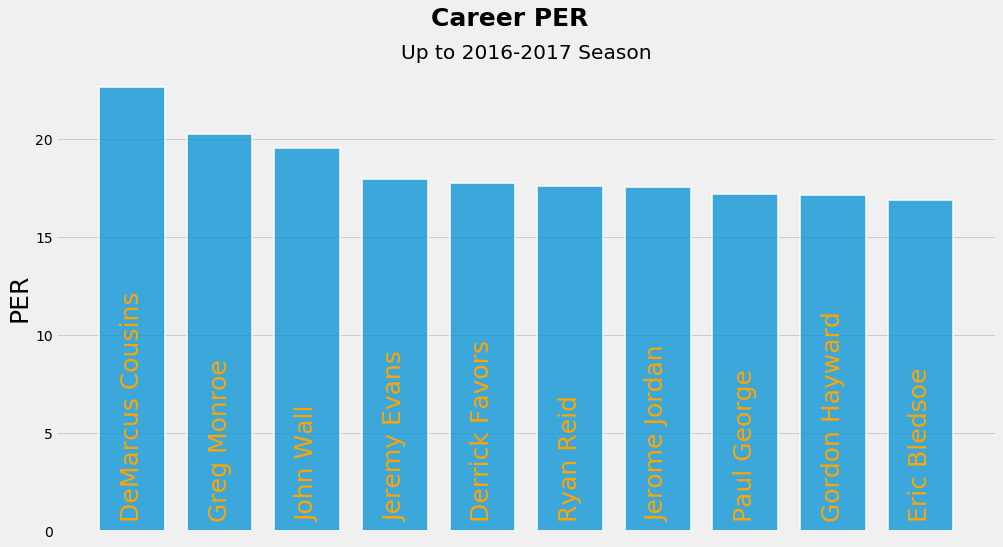

In [57]:
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, per['PER','mean'], width = 0.75, alpha = 0.75, label = per['Player'], edgecolor = 'white', linewidth = 2)
for i in pos:
    plt.text(pos[i], 0.5, s = per['Player'][i],ha='center', va='bottom', rotation = 'vertical', color = 'orange', size = 25)
plt.xticks([],[])
ax.set_ylabel('PER', size = 25)

fig.suptitle("Career PER", weight = 'bold', size = 25)
ax.set_title('Up to 2016-2017 Season', fontname = 'Rockwell')

In [48]:
vorp = Main_data.sort_values([('VORP','mean')], ascending = False).head(10).reset_index()

Text(0.5,1,'Up to 2016-2017 Season')

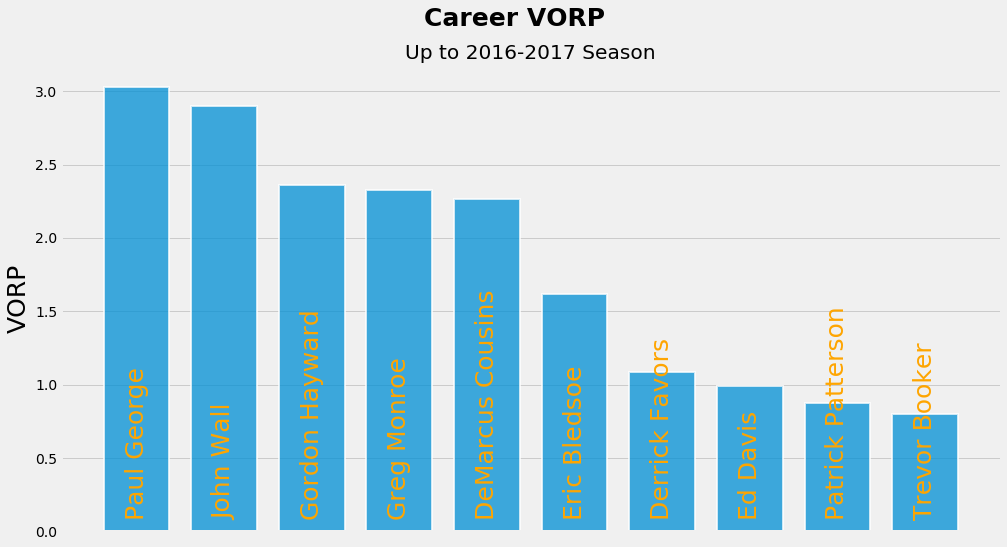

In [58]:
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, vorp['VORP','mean'], width = 0.75, alpha = 0.75, label = vorp['Player'], edgecolor = 'white', linewidth = 2)
for i in pos:
    plt.text(pos[i], 0.08, s = vorp['Player'][i],ha='center', va='bottom', rotation = 'vertical', color = 'orange', size = 25)
plt.xticks([],[])
ax.set_ylabel('VORP', size = 25)
fig.suptitle("Career VORP", weight = 'bold', size = 25)
ax.set_title('Up to 2016-2017 Season', fontname = 'Rockwell')